In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 16.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=b50f089d5f9b684b2582f7fd474acb65d23fb4ec3812bea30d8bb29049ee67d2
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


# homework 1
## Prediction of rainfall

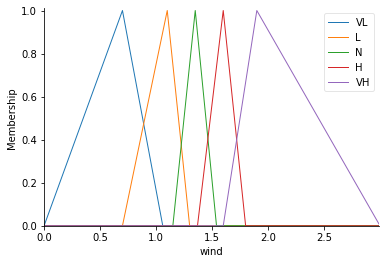

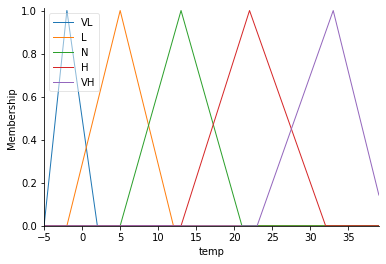

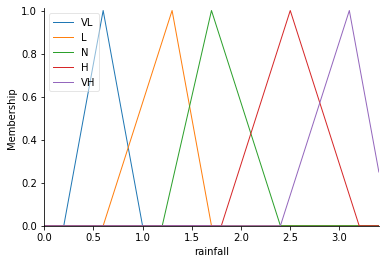

In [ ]:

# make input and output

wind_speed = ctrl.Antecedent(np.arange(0,3,0.01),"wind")
temp = ctrl.Antecedent(np.arange(-5,40,1),"temp")
rainfall = ctrl.Consequent(np.arange(0,3.5,0.1),"rainfall")

# make membership
wind_speed["VL"]  = fuzz.trimf(wind_speed.universe,[0,0.7,1.06])
wind_speed["L"]   = fuzz.trimf(wind_speed.universe,[0.7,1.1,1.3])
wind_speed["N"]   = fuzz.trimf(wind_speed.universe,[1.15,1.35,1.54])
wind_speed["H"]   = fuzz.trimf(wind_speed.universe,[1.37,1.6,1.8])
wind_speed["VH"]  = fuzz.trimf(wind_speed.universe,[1.6,1.9,3])

temp["VL"]    = fuzz.trimf(temp.universe,[-5,-2,2])
temp["L"]     = fuzz.trimf(temp.universe,[-2,5,12])
temp["N"]     = fuzz.trimf(temp.universe,[5,13,21])
temp["H"]     = fuzz.trimf(temp.universe,[13,22,32])
temp["VH"]    = fuzz.trimf(temp.universe,[23,33,40])

rainfall["VL"] = fuzz.trimf(rainfall.universe,[0.2,0.6,1])
rainfall["L"] = fuzz.trimf(rainfall.universe,[0.6,1.3,1.7])
rainfall["N"] = fuzz.trimf(rainfall.universe,[1.2,1.7,2.4])
rainfall["H"] = fuzz.trimf(rainfall.universe,[1.8,2.5,3.2])
rainfall["VH"] = fuzz.trimf(rainfall.universe,[2.4,3.1,3.5])

wind_speed.view()
temp.view()
rainfall.view()




In [ ]:
# make rule
rule1 = ctrl.Rule((temp["VL"]&(wind_speed["VL"] or wind_speed["L"])) or (temp["L"]&(wind_speed["VL"] or wind_speed["L"])),rainfall["VL"])
rule2 = ctrl.Rule((wind_speed["N"]&(temp["VL"] or temp["L"])) or (wind_speed["H"]&temp["VL"]) or (temp["N"]&(wind_speed["VL"] or wind_speed["L"])) or (wind_speed["VL"]&temp["H"]), rainfall["L"])
rule3 = ctrl.Rule((wind_speed["VL"]&temp["VH"]) or (wind_speed["VH"]&temp["VL"]) or (wind_speed["H"]&temp["L"]) or (wind_speed["L"]&temp["H"]) or ((wind_speed["N"]&temp["N"])),rainfall["N"])
rule4 = ctrl.Rule((wind_speed["N"]&(temp["VH"] or temp["H"])) or (wind_speed["VH"]&temp["L"]) or (temp["N"]&(wind_speed["VH"] or wind_speed["H"])) or (wind_speed["L"]&temp["VH"]), rainfall["H"])
rule5 = ctrl.Rule((temp["H"]&(wind_speed["VH"] or wind_speed["H"])) or (temp["VH"]&(wind_speed["VH"] or wind_speed["H"])),rainfall["VH"])

rain_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
level     = ctrl.ControlSystemSimulation(rain_ctrl)

In [ ]:
level.input["wind"] = 1.5
level.input["temp"] = 25
level.compute()
print(level.output["rainfall"])

2.5


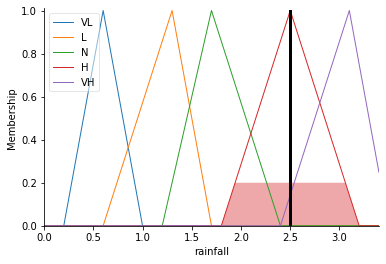

In [ ]:
rainfall.view(sim = level)

# homework2
## Intelligent Size Matching Recomender System


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# make input and output
height    = ctrl.Antecedent(np.arange(93.5,164.01,0.01),"height")
chest     = ctrl.Antecedent(np.arange(49.3,82.51,0.01),"chest")
waist     = ctrl.Antecedent(np.arange(46.75,67.26,0.01),"waist")

size_h      = ctrl.Consequent(np.arange(4,15,1),"size_h")
size_c      = ctrl.Consequent(np.arange(4,15,1),"size_c")
size_w      = ctrl.Consequent(np.arange(4,15,1),"size_w")

# make membership
height["4.5"]   = fuzz.trimf(height.universe,[93.5,106.15,110])
height["5.5"]   = fuzz.trimf(height.universe,[93.5,111.94,116])
height["6.5"]   = fuzz.trimf(height.universe,[93.5,117.73,122])
height["7.5"]   = fuzz.trimf(height.universe,[93.5,123.52,128])
height["8.5"]   = fuzz.trimf(height.universe,[93.5,129.31,134])
height["9.5"]   = fuzz.trimf(height.universe,[93.5,135.1,140])
height["10.5"]  = fuzz.trimf(height.universe,[93.5,140.89,146])
height["11.5"]  = fuzz.trimf(height.universe,[93.5,146.68,152])
height["12.5"]  = fuzz.trimf(height.universe,[93.5,152.47,158])
height["13.5"]  = fuzz.trimf(height.universe,[93.5,158.26,164])

chest["4.5"]   = fuzz.trimf(chest.universe,[49.3,55.97,58])
chest["5.5"]   = fuzz.trimf(chest.universe,[49.3,58.38,60.5])
chest["6.5"]   = fuzz.trimf(chest.universe,[49.3,60.80,63])
chest["7.5"]   = fuzz.trimf(chest.universe,[49.3,62.73,65])
chest["8.5"]   = fuzz.trimf(chest.universe,[49.3,66.10,68.5])
chest["9.5"]   = fuzz.trimf(chest.universe,[49.3,69.00,71.5])
chest["10.5"]  = fuzz.trimf(chest.universe,[49.3,71.89,74.5])
chest["11.5"]  = fuzz.trimf(chest.universe,[49.3,75.27,78])
chest["12.5"]  = fuzz.trimf(chest.universe,[49.3,77.20,80])
chest["13.5"]  = fuzz.trimf(chest.universe,[49.3,79.61,82.5])

waist["4.5"]   = fuzz.trimf(waist.universe,[46.75,53.08,55.00])
waist["5.5"]   = fuzz.trimf(waist.universe,[46.75,54.04,56.00])
waist["6.5"]   = fuzz.trimf(waist.universe,[46.75,55.01,57.00])
waist["7.5"]   = fuzz.trimf(waist.universe,[46.75,55.97,58.00])
waist["8.5"]   = fuzz.trimf(waist.universe,[46.75,57.90,60.00])
waist["9.5"]   = fuzz.trimf(waist.universe,[46.75,59.59,61.75])
waist["10.5"]  = fuzz.trimf(waist.universe,[46.75,61.76,64.00])
waist["11.5"]  = fuzz.trimf(waist.universe,[46.75,63.21,65.50])
waist["12.5"]  = fuzz.trimf(waist.universe,[46.75,64.17,66.50])
waist["13.5"]  = fuzz.trimf(waist.universe,[46.75,64.90,67.25])

size_h["4.5"]   = fuzz.trapmf(size_h.universe,[4,4,5,6])
size_h["5.5"]   = fuzz.trapmf(size_h.universe,[4,5,6,7])
size_h["6.5"]   = fuzz.trapmf(size_h.universe,[5,6,7,8])
size_h["7.5"]   = fuzz.trapmf(size_h.universe,[6,7,8,9])
size_h["8.5"]   = fuzz.trapmf(size_h.universe,[7,8,9,10])
size_h["9.5"]   = fuzz.trapmf(size_h.universe,[8,9,10,11])
size_h["10.5"]  = fuzz.trapmf(size_h.universe,[9,10,11,12])
size_h["11.5"]  = fuzz.trapmf(size_h.universe,[10,11,12,13])
size_h["12.5"]  = fuzz.trapmf(size_h.universe,[11,12,13,14])
size_h["13.5"]  = fuzz.trapmf(size_h.universe,[12,13,14,14])

size_c["4.5"]   = fuzz.trapmf(size_c.universe,[4,4,5,6])
size_c["5.5"]   = fuzz.trapmf(size_c.universe,[4,5,6,7])
size_c["6.5"]   = fuzz.trapmf(size_c.universe,[5,6,7,8])
size_c["7.5"]   = fuzz.trapmf(size_c.universe,[6,7,8,9])
size_c["8.5"]   = fuzz.trapmf(size_c.universe,[7,8,9,10])
size_c["9.5"]   = fuzz.trapmf(size_c.universe,[8,9,10,11])
size_c["10.5"]  = fuzz.trapmf(size_c.universe,[9,10,11,12])
size_c["11.5"]  = fuzz.trapmf(size_c.universe,[10,11,12,13])
size_c["12.5"]  = fuzz.trapmf(size_c.universe,[11,12,13,14])
size_c["13.5"]  = fuzz.trapmf(size_c.universe,[12,13,14,14])

size_w["4.5"]   = fuzz.trapmf(size_w.universe,[4,4,5,6])
size_w["5.5"]   = fuzz.trapmf(size_w.universe,[4,5,6,7])
size_w["6.5"]   = fuzz.trapmf(size_w.universe,[5,6,7,8])
size_w["7.5"]   = fuzz.trapmf(size_w.universe,[6,7,8,9])
size_w["8.5"]   = fuzz.trapmf(size_w.universe,[7,8,9,10])
size_w["9.5"]   = fuzz.trapmf(size_w.universe,[8,9,10,11])
size_w["10.5"]  = fuzz.trapmf(size_w.universe,[9,10,11,12])
size_w["11.5"]  = fuzz.trapmf(size_w.universe,[10,11,12,13])
size_w["12.5"]  = fuzz.trapmf(size_w.universe,[11,12,13,14])
size_w["13.5"]  = fuzz.trapmf(size_w.universe,[12,13,14,14])


In [ ]:
# make rule
rule_h = []
rule_c = []
rule_w = []
for i in np.arange(4,14):
  rule_h.append(ctrl.Rule(height[str(i+0.5)],size_h[str(i+0.5)]))
  rule_c.append(ctrl.Rule(chest[str(i+0.5)],size_c[str(i+0.5)]))
  rule_w.append(ctrl.Rule(waist[str(i+0.5)],size_w[str(i+0.5)]))

h_control = ctrl.ControlSystem(rule_h)
c_control = ctrl.ControlSystem(rule_c)
w_control = ctrl.ControlSystem(rule_w)

size_height = ctrl.ControlSystemSimulation(h_control)
size_chest  = ctrl.ControlSystemSimulation(c_control)
size_waist  = ctrl.ControlSystemSimulation(w_control)

In [ ]:
size_height.input["height"] =  158
size_chest.input["chest"]   = 77.20
size_waist.input["waist"]   = 64.17
size_height.compute() 
size_chest.compute()
size_waist.compute()
print((size_height.output['size_h']+size_chest.output['size_c']+size_waist.output['size_w'])/3)

12.669084663499175


# homework 3
## Medical diagnois system


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# make input and output

fever     = ctrl.Antecedent(np.arange(0.1,1.0,0.1),"fever")
headache  = ctrl.Antecedent(np.arange(0.1,1.0,0.1),"headache")
nausea    = ctrl.Antecedent(np.arange(0.1,1.0,0.1),"nausea")
vomitting = ctrl.Antecedent(np.arange(0.1,1.0,0.1),"vomit")
jaundice  = ctrl.Antecedent(np.arange(0.1,1.0,0.1),"jaund")
liver     = ctrl.Antecedent(np.arange(0.1,1.0,0.1),"liver")
pain      = ctrl.Antecedent(np.arange(0.1,1.0,0.1),"pain")
weakness  = ctrl.Antecedent(np.arange(0.1,1.0,0.1),"weakness")
diziness  = ctrl.Antecedent(np.arange(0.1,1.0,0.1),"dizy")
appetite  = ctrl.Antecedent(np.arange(0.1,1.0,0.1),"appetite")
mp        = ctrl.Antecedent(np.arange(0.1,1.0,0.1),"mp")

malaria   = ctrl.Consequent(np.arange(0.1,1.0,0.01),"malaria")

In [ ]:
# make membership
mild      = [0.1, 0.2,0.3]
moderate  = [0.3,0.45,0.6]
severe    = [0.6, 0.7,0.8]
v_severe  = [0.8, 0.9,1.0]

fever["m"]  = fuzz.trimf(fever.universe,mild)
fever["mo"] = fuzz.trimf(fever.universe,moderate)
fever["s"]  = fuzz.trimf(fever.universe,severe)
fever["vs"] = fuzz.trimf(fever.universe,v_severe)

headache["m"]  = fuzz.trimf(headache.universe,mild)
headache["mo"] = fuzz.trimf(headache.universe,moderate)
headache["s"]  = fuzz.trimf(headache.universe,severe)
headache["vs"] = fuzz.trimf(headache.universe,v_severe)

nausea["m"]  = fuzz.trimf(nausea.universe,mild)
nausea["mo"] = fuzz.trimf(nausea.universe,moderate)
nausea["s"]  = fuzz.trimf(nausea.universe,severe)
nausea["vs"] = fuzz.trimf(nausea.universe,v_severe)

vomitting["m"]  = fuzz.trimf(vomitting.universe,mild)
vomitting["mo"] = fuzz.trimf(vomitting.universe,moderate)
vomitting["s"]  = fuzz.trimf(vomitting.universe,severe)
vomitting["vs"] = fuzz.trimf(vomitting.universe,v_severe)

jaundice["m"]  = fuzz.trimf(jaundice.universe,mild)
jaundice["mo"] = fuzz.trimf(jaundice.universe,moderate)
jaundice["s"]  = fuzz.trimf(jaundice.universe,severe)
jaundice["vs"] = fuzz.trimf(jaundice.universe,v_severe)

liver["m"]  = fuzz.trimf(liver.universe,mild)
liver["mo"] = fuzz.trimf(liver.universe,moderate)
liver["s"]  = fuzz.trimf(liver.universe,severe)
liver["vs"] = fuzz.trimf(liver.universe,v_severe)

pain["m"]  = fuzz.trimf(pain.universe,mild)
pain["mo"] = fuzz.trimf(pain.universe,moderate)
pain["s"]  = fuzz.trimf(pain.universe,severe)
pain["vs"] = fuzz.trimf(pain.universe,v_severe)

weakness["m"]  = fuzz.trimf(weakness.universe,mild)
weakness["mo"] = fuzz.trimf(weakness.universe,moderate)
weakness["s"]  = fuzz.trimf(weakness.universe,severe)
weakness["vs"] = fuzz.trimf(weakness.universe,v_severe)

diziness["m"]  = fuzz.trimf(diziness.universe,mild)
diziness["mo"] = fuzz.trimf(diziness.universe,moderate)
diziness["s"]  = fuzz.trimf(diziness.universe,severe)
diziness["vs"] = fuzz.trimf(diziness.universe,v_severe)

appetite["m"]  = fuzz.trimf(appetite.universe,mild)
appetite["mo"] = fuzz.trimf(appetite.universe,moderate)
appetite["s"]  = fuzz.trimf(appetite.universe,severe)
appetite["vs"] = fuzz.trimf(appetite.universe,v_severe)

mp["m"]  = fuzz.trimf(mp.universe,mild)
mp["mo"] = fuzz.trimf(mp.universe,moderate)
mp["s"]  = fuzz.trimf(mp.universe,severe)
mp["vs"] = fuzz.trimf(mp.universe,v_severe)

malaria["m"]  = fuzz.trimf(malaria.universe,mild)
malaria["mo"] = fuzz.trimf(malaria.universe,moderate)
malaria["s"]  = fuzz.trimf(malaria.universe,severe)
malaria["vs"] = fuzz.trimf(malaria.universe,v_severe)

In [ ]:
# make rule
rule1 = ctrl.Rule(fever["m"]&headache["m"]&nausea["m"]&vomitting["m"]&jaundice["m"]&liver["m"]&pain["m"]&weakness["m"]&diziness["s"]&appetite["m"]&mp["m"],malaria["m"])
rule2 = ctrl.Rule(fever["mo"]&headache["m"]&nausea["m"]&vomitting["m"]&jaundice["m"]&liver["m"]&pain["mo"]&weakness["mo"]&diziness["s"]&appetite["s"]&mp["mo"],malaria["mo"])
rule3 = ctrl.Rule(fever["s"]&headache["mo"]&nausea["m"]&vomitting["m"]&jaundice["m"]&liver["m"]&pain["m"]&weakness["s"]&diziness["s"]&appetite["s"]&mp["mo"],malaria["s"])
rule4 = ctrl.Rule(fever["vs"]&headache["m"]&nausea["m"]&vomitting["m"]&jaundice["m"]&liver["m"]&pain["s"]&weakness["s"]&diziness["m"]&appetite["m"]&mp["s"],malaria["vs"])
rule5 = ctrl.Rule(fever["mo"]&headache["m"]&nausea["m"]&vomitting["mo"]&jaundice["m"]&liver["m"]&pain["mo"]&weakness["mo"]&diziness["mo"]&appetite["s"]&mp["mo"],malaria["mo"])
rule6 = ctrl.Rule(fever["m"]&headache["mo"]&nausea["mo"]&vomitting["m"]&jaundice["m"]&liver["m"]&pain["m"]&weakness["m"]&diziness["mo"]&appetite["m"]&mp["m"],malaria["m"])
rule7 = ctrl.Rule(fever["m"]&headache["m"]&nausea["mo"]&vomitting["mo"]&jaundice["m"]&liver["m"]&pain["s"]&weakness["s"]&diziness["mo"]&appetite["mo"]&mp["mo"],malaria["s"])
rule8 = ctrl.Rule(fever["mo"]&headache["mo"]&nausea["mo"]&vomitting["mo"]&jaundice["mo"]&liver["mo"]&pain["mo"]&weakness["mo"]&diziness["mo"]&appetite["mo"]&mp["mo"],malaria["mo"])
rule9 = ctrl.Rule(fever["mo"]&headache["m"]&nausea["mo"]&vomitting["mo"]&jaundice["m"]&liver["s"]&pain["mo"]&weakness["mo"]&diziness["s"]&appetite["mo"]&mp["mo"],malaria["mo"])
rule10 = ctrl.Rule(fever["m"]&headache["m"]&nausea["mo"]&vomitting["mo"]&jaundice["m"]&liver["mo"]&pain["m"]&weakness["m"]&diziness["m"]&appetite["m"]&mp["m"],malaria["m"])
rule11 = ctrl.Rule(fever["s"]&headache["s"]&nausea["s"]&vomitting["s"]&jaundice["s"]&liver["s"]&pain["s"]&weakness["vs"]&diziness["s"]&appetite["s"]&mp["mo"],malaria["vs"])
rule12 = ctrl.Rule(fever["mo"]&headache["s"]&nausea["mo"]&vomitting["s"]&jaundice["mo"]&liver["s"]&pain["mo"]&weakness["s"]&diziness["mo"]&appetite["m"]&mp["mo"],malaria["s"])
rule13 = ctrl.Rule(fever["s"]&headache["mo"]&nausea["m"]&vomitting["m"]&jaundice["m"]&liver["m"]&pain["m"]&weakness["s"]&diziness["s"]&appetite["s"]&mp["mo"],malaria["s"])
rule14 = ctrl.Rule(fever["s"]&headache["s"]&nausea["mo"]&vomitting["s"]&jaundice["s"]&liver["s"]&pain["s"]&weakness["s"]&diziness["mo"]&appetite["mo"]&mp["s"],malaria["s"])
rule15 = ctrl.Rule(fever["s"]&headache["s"]&nausea["mo"]&vomitting["s"]&jaundice["s"]&liver["s"]&pain["s"]&weakness["s"]&diziness["mo"]&appetite["mo"]&mp["s"],malaria["s"])
rule16 = ctrl.Rule(fever["vs"]&headache["mo"]&nausea["m"]&vomitting["mo"]&jaundice["s"]&liver["mo"]&pain["m"]&weakness["vs"]&diziness["s"]&appetite["m"]&mp["mo"],malaria["vs"])
rule17 = ctrl.Rule(fever["m"]&headache["vs"]&nausea["mo"]&vomitting["mo"]&jaundice["m"]&liver["mo"]&pain["m"]&weakness["mo"]&diziness["vs"]&appetite["m"]&mp["mo"],malaria["vs"])
rule18 = ctrl.Rule(fever["mo"]&headache["vs"]&nausea["vs"]&vomitting["m"]&jaundice["s"]&liver["s"]&pain["mo"]&weakness["s"]&diziness["vs"]&appetite["vs"]&mp["s"],malaria["vs"])
rule19 = ctrl.Rule(fever["mo"]&headache["mo"]&nausea["mo"]&vomitting["mo"]&jaundice["m"]&liver["m"]&pain["mo"]&weakness["mo"]&diziness["mo"]&appetite["mo"]&mp["mo"],malaria["mo"])
rule20 = ctrl.Rule(fever["vs"]&headache["s"]&nausea["s"]&vomitting["s"]&jaundice["s"]&liver["s"]&pain["s"]&weakness["s"]&diziness["s"]&appetite["s"]&mp["mo"],malaria["vs"])


malaria_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
diagnose = ctrl.ControlSystemSimulation(malaria_ctrl)


0.10379166666666663


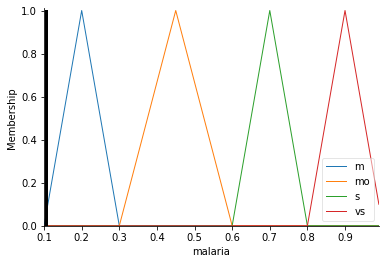

In [ ]:
diagnose.input["fever"] = 0.2
diagnose.input["headache"] = 0.2
diagnose.input["nausea"] = 0.2
diagnose.input["vomit"] = 0.2
diagnose.input["jaund"] = 0.2
diagnose.input["liver"] = 0.2
diagnose.input["pain"] = 0.2
diagnose.input["weakness"] = 0.23
diagnose.input["dizy"] = 0.7
diagnose.input["appetite"] = 0.3
diagnose.input["mp"] = 0.23

diagnose.compute()
print(diagnose.output["malaria"])
malaria.view(sim = diagnose)

# homework 4
## Adaptive food suggestion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# make input and output
taste     = ctrl.Antecedent(np.arange(0,3.0,0.01),"taste")
enviroment= ctrl.Antecedent(np.arange(0,3.0,0.01),"enviroment")
budget    = ctrl.Antecedent(np.arange(0,3.0,0.01),"budget")
u_review  = ctrl.Antecedent(np.arange(0,3.0,0.01),"u_review")
location  = ctrl.Antecedent(np.arange(0,3.0,0.01),"location")

level     = ctrl.Consequent(np.arange(0,10.01,0.01),"level")

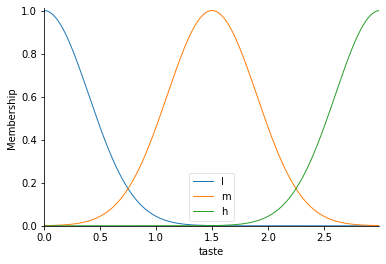

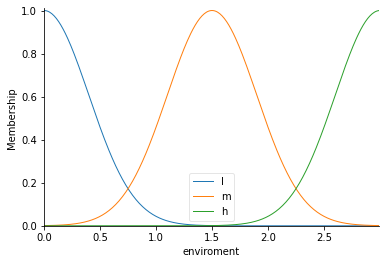

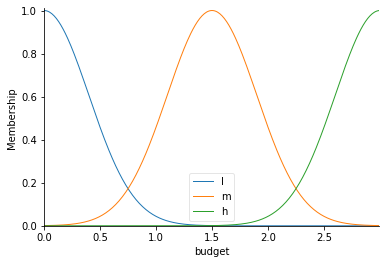

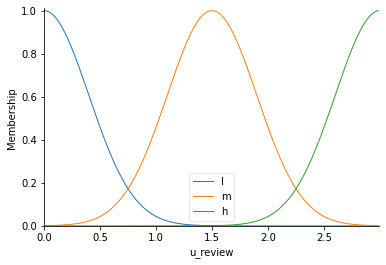

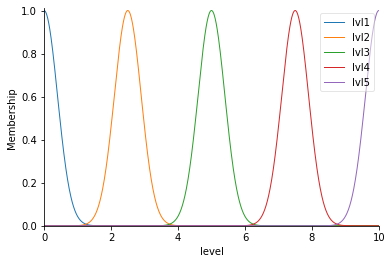

In [ ]:
# make membership
taste["l"]  = fuzz.gaussmf(taste.universe,0,0.4)
taste["m"]  = fuzz.gaussmf(taste.universe,1.5,0.4)
taste["h"]  = fuzz.gaussmf(taste.universe,3,0.4)

enviroment["l"]  = fuzz.gaussmf(enviroment.universe,0,0.4)
enviroment["m"]  = fuzz.gaussmf(enviroment.universe,1.5,0.4)
enviroment["h"]  = fuzz.gaussmf(enviroment.universe,3,0.4)

budget["l"]  = fuzz.gaussmf(budget.universe,0,0.4)
budget["m"]  = fuzz.gaussmf(budget.universe,1.5,0.4)
budget["h"]  = fuzz.gaussmf(budget.universe,3,0.4)

u_review["l"]  = fuzz.gaussmf(u_review.universe,0,0.4)
u_review["m"]  = fuzz.gaussmf(u_review.universe,1.5,0.4)
u_review["h"]  = fuzz.gaussmf(u_review.universe,3,0.4)

location["l"]  = fuzz.gaussmf(location.universe,0,0.4)
location["m"]  = fuzz.gaussmf(location.universe,1.5,0.4)
location["h"]  = fuzz.gaussmf(location.universe,3,0.4)

level["lvl1"]  = fuzz.gaussmf(level.universe,0,0.4)
level["lvl2"]  = fuzz.gaussmf(level.universe,2.5,0.4)
level["lvl3"]  = fuzz.gaussmf(level.universe,5,0.4)
level["lvl4"]  = fuzz.gaussmf(level.universe,7.5,0.4)
level["lvl5"]  = fuzz.gaussmf(level.universe,10,0.4)
taste.view()
enviroment.view()
budget.view()
u_review.view()
level.view()

In [ ]:
# make rule
rule = []
lst = [0,1.5,3.0]
decode = ["l",'m','h']
for i in lst:
  for j in lst:
    for k in lst:
      for m in lst:
        for n in lst:
          score = i+j+k+m+n           
          if score < 3:
            rule.append(ctrl.Rule(taste[decode[lst.index(i)]]&enviroment[decode[lst.index(j)]]&budget[decode[lst.index(k)]]&u_review[decode[lst.index(m)]]&location[decode[lst.index(n)]],level["lvl1"]))
       
          elif score < 6:
            rule.append(ctrl.Rule(taste[decode[lst.index(i)]]&enviroment[decode[lst.index(j)]]&budget[decode[lst.index(k)]]&u_review[decode[lst.index(m)]]&location[decode[lst.index(n)]],level["lvl2"]))
         
          elif score < 9:
            rule.append(ctrl.Rule(taste[decode[lst.index(i)]]&enviroment[decode[lst.index(j)]]&budget[decode[lst.index(k)]]&u_review[decode[lst.index(m)]]&location[decode[lst.index(n)]],level["lvl3"]))
        
          elif score < 12:
            rule.append(ctrl.Rule(taste[decode[lst.index(i)]]&enviroment[decode[lst.index(j)]]&budget[decode[lst.index(k)]]&u_review[decode[lst.index(m)]]&location[decode[lst.index(n)]],level["lvl4"]))
           
           
          elif score <= 15:
            rule.append(ctrl.Rule(taste[decode[lst.index(i)]]&enviroment[decode[lst.index(j)]]&budget[decode[lst.index(k)]]&u_review[decode[lst.index(m)]]&location[decode[lst.index(n)]],level["lvl5"]))        

[IF (((taste[l] AND enviroment[l]) AND budget[l]) AND u_review[l]) AND location[l] THEN level[lvl1]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (((taste[l] AND enviroment[l]) AND budget[l]) AND u_review[l]) AND location[m] THEN level[lvl1]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (((taste[l] AND enviroment[l]) AND budget[l]) AND u_review[l]) AND location[h] THEN level[lvl2]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (((taste[l] AND enviroment[l]) AND budget[l]) AND u_review[m]) AND location[l] THEN level[lvl1]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (((taste[l] AND enviroment[l]) AND budget[l]) AND u_review[m]) AND location[m] THEN level[lvl2]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (((taste[l] AND enviroment[l]) AND budget[l]) AND u_review[m]) AND location[h] THEN level[lvl2]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF 

In [ ]:
# compute
level_ctrl = ctrl.ControlSystem(rule)
evaluate = ctrl.ControlSystemSimulation(level_ctrl)

0.3522101813592607


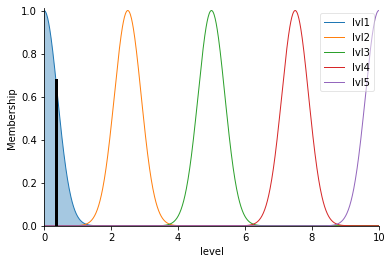

In [ ]:
evaluate.input["taste"] = 0
evaluate.input["enviroment"] =0
evaluate.input["budget"] = 0
evaluate.input["u_review"] = 0
evaluate.input["location"] = 0
evaluate.compute()
print(evaluate.output["level"])
level.view(sim = evaluate)

# homework5
## Nutritional Needs Recommendation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# make input and output
age           = ctrl.Antecedent(np.arange(9,51,1),"age")
bmi_cate      = ctrl.Antecedent(np.arange(10,30,0.01),"bmi")


In [ ]:
height_input = float(input("height:"))
sex_input = input("sex:")
age_input= int(input("age:"))
weight_input=float(input("weight:"))
bmi_input = weight_input/height_input

height:5
sex:35
age:22
weight:545


<class 'skfuzzy.control.antecedent_consequent.Antecedent'>


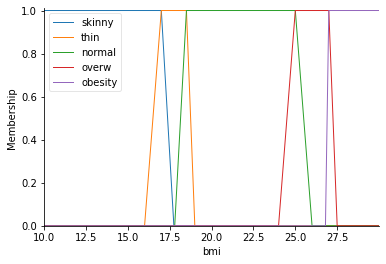

In [ ]:
# make membership

bmi_cate["skinny"]  = fuzz.trapmf(bmi_cate.universe,[10,10,17,17.75])
bmi_cate["thin"]    = fuzz.trapmf(bmi_cate.universe,[16,17,18.5,19])
bmi_cate["normal"]  = fuzz.trapmf(bmi_cate.universe,[17.8,18.5,25,26])
bmi_cate["overw"]   = fuzz.trapmf(bmi_cate.universe,[24,25,27,27.5])
bmi_cate["obesity"] = fuzz.trapmf(bmi_cate.universe,[26.8,27,30,30])

bmi_cate.view()

age["child"]    = fuzz.trapmf(age.universe,[9,9,25,27])
age["aldult"]   = fuzz.trapmf(age.universe,[25.5,27,50,50])


print(type(bmi_cate))

In [ ]:
# make rule
rule1 = ctrl.Rule(age["child"]&bmi_cate["thin"],(height_input**2)*19*24*1.65+500)

ValueError: ignored

# homework 6
## A Predictive Stock Market Technical Analysis Using Fuzzy Logic

In [ ]:
# make input and output


# Bo dieu khen PID cho dong co DC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# make input and output
error = ctrl.Antecedent(np.arange(-100,100,0.1),"error")
de_error = ctrl.Antecedent(np.arange(-100,100,0.1),'de_error')

u = ctrl.Consequent(np.arange(-100,100,0.1),"u")

In [ ]:
# make membership

error["LN"] = fuzz.trimf(error.universe,[-100,-100,-50])
error["SN"] = fuzz.trimf(error.universe,[-100,-50,0])
error["ZO"] = fuzz.trimf(error.universe,[-50,0,50])
error["SP"] = fuzz.trimf(error.universe,[0,50,100])
error["LP"] = fuzz.trimf(error.universe,[50,100,100])

de_error["LN"] = fuzz.trimf(de_error.universe,[-100,-100,-50])
de_error["SN"] = fuzz.trimf(de_error.universe,[-100,-50,0])
de_error["ZO"] = fuzz.trimf(de_error.universe,[-50,0,50])
de_error["SP"] = fuzz.trimf(de_error.universe,[0,50,100])
de_error["LP"] = fuzz.trimf(de_error.universe,[50,100,100])

u["LN"] = fuzz.trimf(u.universe,[-100,-100,-50])
u["SN"] = fuzz.trimf(u.universe,[-100,-50,0])
u["ZO"] = fuzz.trimf(u.universe,[-50,0,50])
u["SP"] = fuzz.trimf(u.universe,[0,50,100])
u["LP"] = fuzz.trimf(u.universe,[50,100,100])

In [ ]:
# make rule
rule1 = ctrl.Rule((error["LN"]&(de_error["LN"] or de_error["SN"])) or (error["SN"]&(de_error["LN"] or de_error["SN"])),u["LN"])
rule2 = ctrl.Rule((error["ZO"]&(de_error["LN"] or de_error["SN"])) or (de_error["ZO"]&(error["LN"] or error["SN"])),u["SN"])
rule3 = ctrl.Rule((error["LN"]&de_error["LP"]) or (error["SN"] & de_error["SP"]) or (error["ZO"] & de_error["ZO"]) or (error["SP"] & de_error["SN"]) or (error["LP"] & de_error["LN"]),u["ZO"])
rule4 = ctrl.Rule((error["LP"]&(de_error['SN'] or de_error["ZO"])) or (error["SP"]&de_error["ZO"]) or (error["ZO"]&de_error["SP"]) or (de_error["LP"]&(error['SN'] or error["ZO"])),u["SP"])
rule5 = ctrl.Rule((error["LP"]&(de_error["LP"] or de_error["SP"])) or (error["SP"]&(de_error["LP"] or de_error["SP"])),u["LP"])

In [ ]:
# compute
speed_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
speed = ctrl.ControlSystemSimulation(speed_ctrl)

83.26666666665906


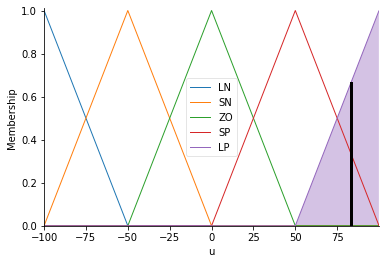

In [ ]:
speed.input["error"] = 100
speed.input["de_error"] =100
speed.compute()
print(speed.output["u"])
u.view(sim = speed)

# Control inverted pendulum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# make input and output
error = ctrl.Antecedent(np.arange(-np.pi/2,np.pi/2+0.01,0.01),"error")
de_error = ctrl.Antecedent(np.arange(-np.pi/4,np.pi/4+0.01,0.01),'de_error')

force = ctrl.Consequent(np.arange(-100,100+0.01,0.01),"force")

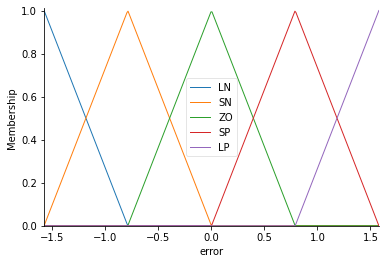

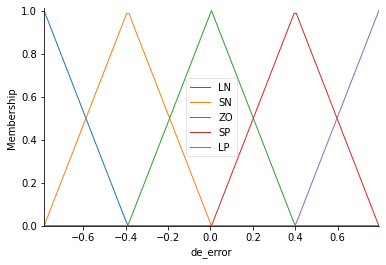

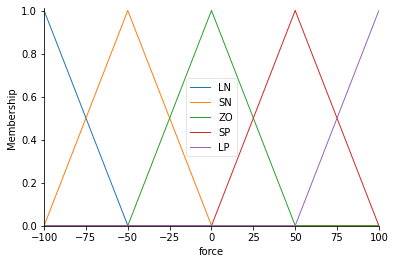

In [ ]:
# make membership
error.automf(names = ["LN","SN","ZO","SP","LP"])
de_error.automf(names = ["LN","SN","ZO","SP","LP"])

force.automf(names = ["LN","SN","ZO","SP","LP"])

error.view()
de_error.view()
force.view()

In [ ]:
# make rule
rule1 = ctrl.Rule((error["LN"]&(de_error["LN"] or de_error["SN"])) or (error["SN"]&(de_error["LN"] or de_error["SN"])),force["LN"])
rule2 = ctrl.Rule((error["ZO"]&(de_error["LN"] or de_error["SN"])) or (de_error["ZO"]&(error["LN"] or error["SN"])),force["SN"])
rule3 = ctrl.Rule((error["LN"]&de_error["LP"]) or (error["SN"]&de_error["SP"]) or (error["ZO"]&de_error["ZO"]) or (error["SP"]&de_error["SN"]) or (error["LP"]&de_error["LN"]),force["ZO"])
rule4 = ctrl.Rule((error["LP"]&(de_error['SN'] or de_error["ZO"])) or (error["SP"]&de_error["ZO"]) or (error["ZO"]&de_error["SP"]) or (de_error["LP"]&(error['SN'] or error["ZO"])),force["SP"])
rule5 = ctrl.Rule((error["LP"]&(de_error["LP"] or de_error["SP"])) or (error["SP"]&(de_error["LP"] or de_error["SP"])),force["LP"])

In [ ]:
# compute
force_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
force_con = ctrl.ControlSystemSimulation(force_ctrl)

-83.33333333332448


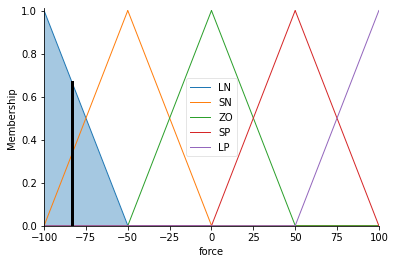

In [ ]:
force_con.input["error"] = -np.pi/2
force_con.input["de_error"] = -1.5
force_con.compute() 
print(force_con.output["force"])
force.view(sim = force_con)


# Control Mobile Robot with 3 sensors 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# make input and output

l_sensor = ctrl.Antecedent(np.arange(0.5,3+0.01,0.01),"l_sensor")
r_sensor = ctrl.Antecedent(np.arange(0.5,3+0.01,0.01),"r_sensor")
c_sensor = ctrl.Antecedent(np.arange(0.5,3+0.01,0.01),"c_sensor")

motor1  = ctrl.Consequent(np.arange(-100,100),"motor1")
motor2  = ctrl.Consequent(np.arange(-100,100),"motor2")

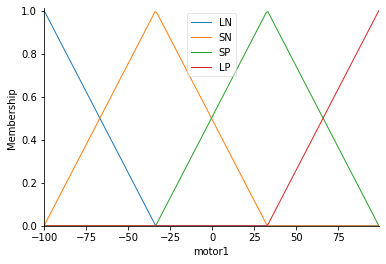

In [ ]:
# make membership

l_sensor["C"] = fuzz.trimf(l_sensor.universe,[0.5,0.5,1])
l_sensor["N"] = fuzz.trimf(l_sensor.universe,[0.7,1.5,2])
l_sensor["F"] = fuzz.trimf(l_sensor.universe,[1.9,2.8,3])

r_sensor["C"] = fuzz.trimf(r_sensor.universe,[0.5,0.5,1])
r_sensor["N"] = fuzz.trimf(r_sensor.universe,[0.7,1.5,2])
r_sensor["F"] = fuzz.trimf(r_sensor.universe,[1.9,2.8,3])

c_sensor["C"] = fuzz.trimf(c_sensor.universe,[0.5,0.5,1])
c_sensor["N"] = fuzz.trimf(c_sensor.universe,[0.7,1.5,2])
c_sensor["F"] = fuzz.trimf(c_sensor.universe,[1.9,2.8,3])

motor1.automf(names = ["LN","SN","SP","LP"])
motor2.automf(names = ["LN","SN","SP","LP"])

motor1.view()

In [ ]:
# make rule
rule1 = ctrl.Rule(c_sensor["F"],[motor1["LP"],motor2["LP"]])
rule2 = ctrl.Rule((c_sensor["C"]&((l_sensor["C"]&r_sensor["C"]) or (l_sensor["C"]&r_sensor["N"]) or (r_sensor["C"]&l_sensor["N"]) or (l_sensor["N"]&r_sensor["N"]))),[motor1["LP"],motor2["LN"]])
rule3 = ctrl.Rule(c_sensor["C"]&((l_sensor["C"]&r_sensor["F"]) or (l_sensor["N"]&r_sensor["F"])),[motor1["LP"],motor2["SP"]])
rule4 = ctrl.Rule(l_sensor["F"]&(c_sensor["C"] or c_sensor["N"]),[motor1["SP"],motor2["LP"]])
rule5 = ctrl.Rule((c_sensor["N"]&((l_sensor["C"]&l_sensor["C"]) or (l_sensor["C"]&r_sensor["N"]) or (r_sensor["C"]&l_sensor["N"]) or (l_sensor["N"]&r_sensor["N"]))),[motor1["SP"],motor2["SN"]])
rule6 = ctrl.Rule(c_sensor["N"]&((l_sensor["C"]&r_sensor["F"]) or (l_sensor["N"]&r_sensor["F"])),[motor1["LP"],motor2["SP"]])

In [ ]:
# compute
sensor_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6])
sensor_compute = ctrl.ControlSystemSimulation(sensor_ctrl)

76.64095556642422
76.64095556642422


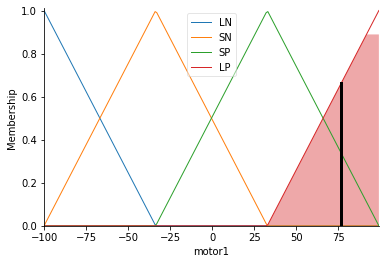

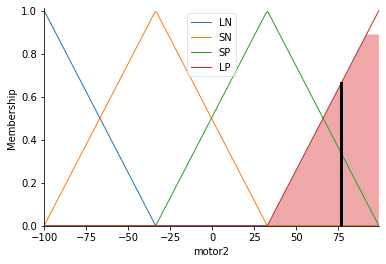

In [ ]:
# show result
sensor_compute.input["l_sensor"]  = 0.7
sensor_compute.input["r_sensor"]  = 0.7
sensor_compute.input["c_sensor"]  = 2.7
sensor_compute.compute()
print(sensor_compute.output["motor1"])
print(sensor_compute.output["motor2"])

motor1.view(sim=sensor_compute)
motor2.view(sim=sensor_compute)

# Control single tank with level

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# make input and output
error = ctrl.Antecedent(np.arange(-15,15,0.1),"error")
de_error = ctrl.Antecedent(np.arange(-10,10,0.1),'de_error')

open_percent = ctrl.Consequent(np.arange(0,100,0.1),"open_percent")

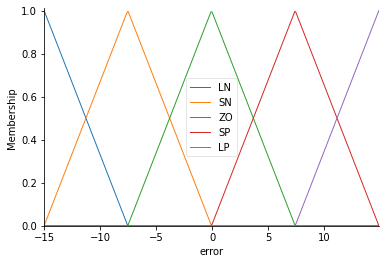

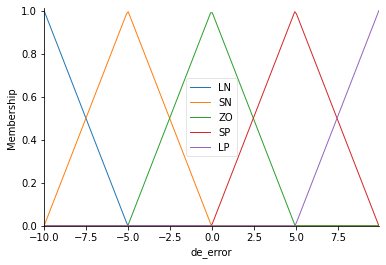

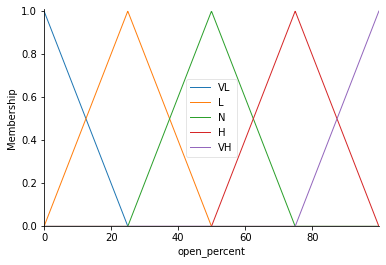

In [ ]:
# make membership
error.automf(names = ["LN","SN","ZO","SP","LP"])
de_error.automf(names = ["LN","SN","ZO","SP","LP"])

open_percent.automf(names = ["VL","L","N","H","VH"])

error.view()
de_error.view()
open_percent.view()

In [ ]:
 # make rule
rule1 = ctrl.Rule((error["LN"]&(de_error["LN"] or de_error["SN"])) or (error["SN"]&de_error["LN"]),open_percent["VH"])
rule2 = ctrl.Rule((de_error["LN"]&(error["ZO"] or error["SP"])) or (error["LN"]&(de_error["ZO"] or de_error["SP"])) or (error["SN"]&de_error["SN"]),open_percent["H"])
rule3 = ctrl.Rule((error["ZO"]&(de_error["SN"] or de_error["ZO"] or de_error["SP"])) or (error["SP"]&(de_error["SN"] or de_error["ZO"])) or (error["SN"]&(de_error["ZO"] or de_error["SP"])) or (error["LN"]&de_error["LP"]),open_percent["N"])
rule4 = ctrl.Rule((error["SP"]&de_error["SP"]) or (error["LP"]&de_error["SN"]),open_percent["L"])
rule5 = ctrl.Rule((error["LP"]&(de_error["ZO"] or de_error["SP"] or de_error["LP"])) or (de_error["LP"]&(error["SN"] or error["ZO"] or error["SP"])), open_percent["VL"]) 

In [ ]:
# compute
open_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
open_compute = ctrl.ControlSystemSimulation(open_ctrl)

91.57495000020045


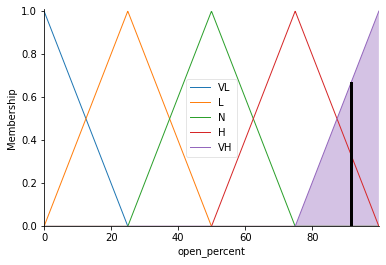

In [ ]:
# show result
open_compute.input["error"]     = -15
open_compute.input["de_error"]  = -10
open_compute.compute()
print(open_compute.output["open_percent"])
open_percent.view(sim=open_compute)

# Fuzzy logic techniques for navigation of several mobile robots

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ModuleNotFoundError: ignored

In [ ]:
# make input and output
l_dist =ctrl.Antecedent(np.arange(0,10.01,0.01),'l_dist')
f_dist =ctrl.Antecedent(np.arange(0,10.01,0.01),'f_dist')
r_dist =ctrl.Antecedent(np.arange(0,10.01,0.01),'r_dist')
l_vel =ctrl.Consequent(np.arange(0,10.01,0.01),'l_vel')
r_vel =ctrl.Consequent(np.arange(0,10.01,0.01),'r_vel')

In [ ]:
# make membership
l_dist['near']=fuzz.gaussmf(l_dist.universe,0,2.5)
l_dist['medium']=fuzz.gaussmf(l_dist.universe,5,2.5)
l_dist['far']=fuzz.gaussmf(l_dist.universe,10,2.5)

f_dist['near']=fuzz.gaussmf(f_dist.universe,0,2.5)
f_dist['medium']=fuzz.gaussmf(f_dist.universe,5,2.5)
f_dist['far']=fuzz.gaussmf(f_dist.universe,10,2.5)

r_dist['near']=fuzz.gaussmf(r_dist.universe,0,2.5)
r_dist['medium']=fuzz.gaussmf(r_dist.universe,5,2.5)
r_dist['far']=fuzz.gaussmf(r_dist.universe,10,2.5)

l_vel['slow']=fuzz.gaussmf(l_vel.universe,0,2.5)
l_vel['medium']=fuzz.gaussmf(l_vel.universe,5,2.5)
l_vel['fast']=fuzz.gaussmf(l_vel.universe,10,2.5)

r_vel['slow']=fuzz.gaussmf(r_vel.universe,0,2.5)
r_vel['medium']=fuzz.gaussmf(r_vel.universe,5,2.5)
r_vel['fast']=fuzz.gaussmf(r_vel.universe,10,2.5)

In [ ]:
# make rule
rule1=ctrl.Rule(l_dist['near'] & f_dist['near'] & r_dist['near'], l_vel['slow'] )
rule2=ctrl.Rule(l_dist['near'] & f_dist['near'] & r_dist['medium'], l_vel['medium'] )
rule3=ctrl.Rule(l_dist['near'] & f_dist['near'] & r_dist['far'], l_vel['fast'] )
rule4=ctrl.Rule(l_dist['near'] & f_dist['medium'] & r_dist['near'], l_vel['slow'] )
rule5=ctrl.Rule(l_dist['near'] & f_dist['medium'] & r_dist['medium'], l_vel['fast'] )
rule6=ctrl.Rule(l_dist['near'] & f_dist['medium'] & r_dist['far'], l_vel['fast'] )
rule7=ctrl.Rule(l_dist['near'] & f_dist['far'] & r_dist['near'], l_vel['slow'] )
rule8=ctrl.Rule(l_dist['near'] & f_dist['far'] & r_dist['medium'], l_vel['fast'] )
rule9=ctrl.Rule(l_dist['near'] & f_dist['far'] & r_dist['far'], l_vel['fast'] )
rule10=ctrl.Rule(l_dist['medium'] & f_dist['near'] & r_dist['near'], l_vel['slow'] )
rule11=ctrl.Rule(l_dist['medium'] & f_dist['near'] & r_dist['medium'], l_vel['slow'] )
rule12=ctrl.Rule(l_dist['medium'] & f_dist['near'] & r_dist['far'], l_vel['fast'] )
rule13=ctrl.Rule(l_dist['medium'] & f_dist['medium'] & r_dist['near'], l_vel['slow'] )
rule14=ctrl.Rule(l_dist['medium'] & f_dist['medium'] & r_dist['medium'], l_vel['medium'] )
rule15=ctrl.Rule(l_dist['medium'] & f_dist['medium'] & r_dist['far'], l_vel['medium'] )
rule16=ctrl.Rule(l_dist['medium'] & f_dist['far'] & r_dist['near'], l_vel['medium'] )
rule17=ctrl.Rule(l_dist['medium'] & f_dist['far'] & r_dist['medium'], l_vel['fast'] )
rule18=ctrl.Rule(l_dist['medium'] & f_dist['far'] & r_dist['far'], l_vel['fast'] )
rule19=ctrl.Rule(l_dist['far'] & f_dist['near'] & r_dist['near'], l_vel['slow'] )
rule20=ctrl.Rule(l_dist['far'] & f_dist['near'] & r_dist['medium'], l_vel['slow'] )
rule21=ctrl.Rule(l_dist['far'] & f_dist['near'] & r_dist['far'], l_vel['slow'] )
rule22=ctrl.Rule(l_dist['far'] & f_dist['medium'] & r_dist['near'], l_vel['slow'] )
rule23=ctrl.Rule(l_dist['far'] & f_dist['medium'] & r_dist['medium'], l_vel['medium'] )
rule24=ctrl.Rule(l_dist['far'] & f_dist['medium'] & r_dist['far'], l_vel['medium'] )
rule25=ctrl.Rule(l_dist['far'] & f_dist['far'] & r_dist['near'], l_vel['slow'] )
rule26=ctrl.Rule(l_dist['far'] & f_dist['far'] & r_dist['medium'], l_vel['medium'] )
rule27=ctrl.Rule(l_dist['far'] & f_dist['far'] & r_dist['far'], l_vel['fast'] )
rule28=ctrl.Rule(l_dist['near'] & f_dist['near'] & r_dist['near'], r_vel['slow'] )
rule29=ctrl.Rule(l_dist['near'] & f_dist['near'] & r_dist['medium'], r_vel['slow'])
rule30=ctrl.Rule(l_dist['near'] & f_dist['near'] & r_dist['far'],  r_vel['slow'])
rule31=ctrl.Rule(l_dist['near'] & f_dist['medium'] & r_dist['near'],  r_vel['slow'])
rule32=ctrl.Rule(l_dist['near'] & f_dist['medium'] & r_dist['medium'],  r_vel['medium'])
rule33=ctrl.Rule(l_dist['near'] & f_dist['medium'] & r_dist['far'],  r_vel['slow'])
rule34=ctrl.Rule(l_dist['near'] & f_dist['far'] & r_dist['near'],  r_vel['slow'])
rule35=ctrl.Rule(l_dist['near'] & f_dist['far'] & r_dist['medium'],  r_vel['medium'])
rule36=ctrl.Rule(l_dist['near'] & f_dist['far'] & r_dist['far'],  r_vel['slow'])
rule37=ctrl.Rule(l_dist['medium'] & f_dist['near'] & r_dist['near'],  r_vel['medium'])
rule38=ctrl.Rule(l_dist['medium'] & f_dist['near'] & r_dist['medium'],  r_vel['slow'])
rule39=ctrl.Rule(l_dist['medium'] & f_dist['near'] & r_dist['far'],  r_vel['slow'])
rule40=ctrl.Rule(l_dist['medium'] & f_dist['medium'] & r_dist['near'],  r_vel['slow'])
rule41=ctrl.Rule(l_dist['medium'] & f_dist['medium'] & r_dist['medium'],  r_vel['medium'])
rule42=ctrl.Rule(l_dist['medium'] & f_dist['medium'] & r_dist['far'],  r_vel['slow'])
rule43=ctrl.Rule(l_dist['medium'] & f_dist['far'] & r_dist['near'],  r_vel['fast'])
rule44=ctrl.Rule(l_dist['medium'] & f_dist['far'] & r_dist['medium'],  r_vel['fast'])
rule45=ctrl.Rule(l_dist['medium'] & f_dist['far'] & r_dist['far'],  r_vel['medium'])
rule46=ctrl.Rule(l_dist['far'] & f_dist['near'] & r_dist['near'],  r_vel['fast'])
rule47=ctrl.Rule(l_dist['far'] & f_dist['near'] & r_dist['medium'],  r_vel['fast'])
rule48=ctrl.Rule(l_dist['far'] & f_dist['near'] & r_dist['far'],  r_vel['slow'])
rule49=ctrl.Rule(l_dist['far'] & f_dist['medium'] & r_dist['near'],  r_vel['fast'])
rule50=ctrl.Rule(l_dist['far'] & f_dist['medium'] & r_dist['medium'], r_vel['fast'])
rule51=ctrl.Rule(l_dist['far'] & f_dist['medium'] & r_dist['far'], r_vel['medium'])
rule52=ctrl.Rule(l_dist['far'] & f_dist['far'] & r_dist['near'],  r_vel['fast'])
rule53=ctrl.Rule(l_dist['far'] & f_dist['far'] & r_dist['medium'], r_vel['fast'])
rule54=ctrl.Rule(l_dist['far'] & f_dist['far'] & r_dist['far'],  r_vel['fast'])

In [ ]:
navi_ctrl=ctrl.ControlSystem([rule1, rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule9,rule10,rule11, rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule19,rule20,rule21, rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule29,rule30,rule31, rule32,rule33,rule34,rule35,rule36,rule37,rule38,rule39,rule39,rule40,rule41, rule42,rule43,rule44,rule45,rule46,rule47,rule48,rule49,rule50,rule51,rule52,rule53])
navigation=ctrl.ControlSystemSimulation(navi_ctrl)

6.338414113111473
5.075838273605307


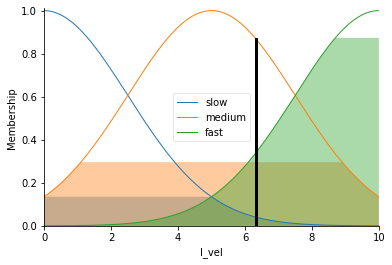

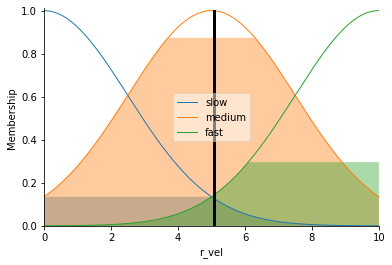

In [ ]:
navigation.input['l_dist'] =1.1
navigation.input['f_dist']=8.7
navigation.input['r_dist']=5
navigation.compute()
print(navigation.output['l_vel'])
print(navigation.output['r_vel'])
l_vel.view(sim=navigation)
r_vel.view(sim=navigation)

# Fuzzy control of a mobile robot

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# make output and input
distance = ctrl.Antecedent(np.arange(0,500.1,0.1),'distance')
angle = ctrl.Antecedent(np.arange(-180,180.1,0.1),'angle')
VR = ctrl.Consequent(np.arange(0,80.1,0.1),'VR')
VL = ctrl.Consequent(np.arange(0,80.1,0.1),'VL')



In [ ]:
# make membership
distance['VS'] = fuzz.trimf(distance.universe,[0,0,125])
distance['S'] = fuzz.trimf(distance.universe,[0,125,250])
distance['M'] = fuzz.trimf(distance.universe,[125,250,375])
distance['B'] = fuzz.trimf(distance.universe,[250,375,500])
distance['VB'] = fuzz.trimf(distance.universe,[375,500,500])


angle['NB'] = fuzz.trimf(angle.universe,[-180,-180,-120])
angle['NM'] = fuzz.trimf(angle.universe,[-180,-120,-60])
angle['NS'] = fuzz.trimf(angle.universe,[-120,-60,0])
angle['Z'] = fuzz.trimf(angle.universe,[-60,0,60])
angle['PS'] = fuzz.trimf(angle.universe,[0,60,120])
angle['PM'] = fuzz.trimf(angle.universe,[60,120,180])
angle['PB'] = fuzz.trimf(angle.universe,[120,180,180])


VR['Z'] = fuzz.trimf(VR.universe,[0,0,10])
VR['F'] = fuzz.trimf(VR.universe,[10,30,40])
VR['M'] = fuzz.trimf(VR.universe,[30,40,50])
VR['B'] = fuzz.trimf(VR.universe,[40,50,60])
VR['VB'] = fuzz.trimf(VR.universe,[60,70,80])


VL['Z'] = fuzz.trimf(VL.universe,[0,0,10])
VL['F'] = fuzz.trimf(VL.universe,[10,30,40])
VL['M'] = fuzz.trimf(VL.universe,[30,40,50])
VL['B'] = fuzz.trimf(VL.universe,[40,50,60])
VL['VB'] = fuzz.trimf(VL.universe,[60,70,80])


In [ ]:
# make rule
rule1 = ctrl.Rule(distance['VS'] & angle['NB'], (VR['B'],VL['Z']))
rule2 = ctrl.Rule(distance['VS'] & angle['NM'], (VR['M'],VL['Z']))
rule3 = ctrl.Rule(distance['VS'] & angle['NS'], (VR['F'],VL['Z']))
rule4 = ctrl.Rule(distance['VS'] & angle['Z'], (VR['Z'],VL['F']));
rule5 = ctrl.Rule(distance['VS'] & angle['PS'], (VR['Z'],VL['F']))
rule6 = ctrl.Rule(distance['VS'] & angle['PM'], (VR['Z'],VL['F']))
rule7 = ctrl.Rule(distance['VS'] & angle['PB'], (VR['Z'],VL['M']))

rule8 = ctrl.Rule(distance['S'] & angle['NB'], (VR['VB'],VL['Z']))
rule9 = ctrl.Rule(distance['S'] & angle['NM'], (VR['B'],VL['Z']))
rule10 = ctrl.Rule(distance['S'] & angle['NS'], (VR['M'],VL['Z']))
rule11 = ctrl.Rule(distance['S'] & angle['Z'], (VR['Z'],VL['F']));
rule12 = ctrl.Rule(distance['S'] & angle['PS'], (VR['Z'],VL['M']))
rule13 = ctrl.Rule(distance['S'] & angle['PM'], (VR['Z'],VL['B']))
rule14 = ctrl.Rule(distance['S'] & angle['PB'], (VR['Z'],VL['VB']))

rule15 = ctrl.Rule(distance['M'] & angle['NB'], (VR['VB'],VL['Z']))
rule16 = ctrl.Rule(distance['M'] & angle['NM'], (VR['VB'],VL['Z']))
rule17 = ctrl.Rule(distance['M'] & angle['NS'], (VR['B'],VL['Z']))
rule18 = ctrl.Rule(distance['M'] & angle['Z'], (VR['M'],VL['M']))
rule19 = ctrl.Rule(distance['M'] & angle['PS'], (VR['Z'],VL['B']))
rule20 = ctrl.Rule(distance['M'] & angle['PM'], (VR['Z'],VL['VB']))
rule21 = ctrl.Rule(distance['M'] & angle['PB'], (VR['Z'],VL['VB']))

rule22 = ctrl.Rule(distance['B'] & angle['NB'], (VR['VB'],VL['Z']))
rule23 = ctrl.Rule(distance['B'] & angle['NM'], (VR['VB'],VL['Z']))
rule24 = ctrl.Rule(distance['B'] & angle['NS'], (VR['VB'],VL['Z']))
rule25 = ctrl.Rule(distance['B'] & angle['Z'], (VR['B'],VL['B']))
rule26 = ctrl.Rule(distance['B'] & angle['PS'], (VR['Z'],VL['VB']))
rule27 = ctrl.Rule(distance['B'] & angle['PM'], (VR['Z'],VL['VB']))
rule28 = ctrl.Rule(distance['B'] & angle['PB'], (VR['Z'],VL['VB']))

rule29 = ctrl.Rule(distance['VB'] & angle['NB'], (VR['VB'],VL['Z']))
rule30 = ctrl.Rule(distance['VB'] & angle['NM'], (VR['VB'],VL['Z']))
rule31 = ctrl.Rule(distance['VB'] & angle['NS'], (VR['VB'],VL['Z']))
rule32 = ctrl.Rule(distance['VB'] & angle['Z'], (VR['VB'],VL['VB']))
rule33 = ctrl.Rule(distance['VB'] & angle['PS'], (VR['Z'],VL['VB']))
rule34 = ctrl.Rule(distance['VB'] & angle['PM'], (VR['Z'],VL['VB']))
rule35 = ctrl.Rule(distance['VB'] & angle['PB'], (VR['Z'],VL['VB']))
velocity_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,rule32,rule33,rule34,rule35])


3.4444444444444438
65.17120280948207


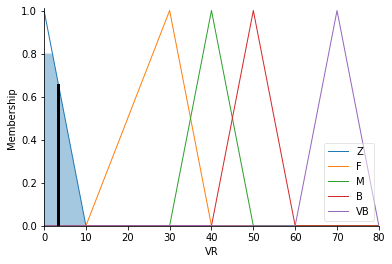

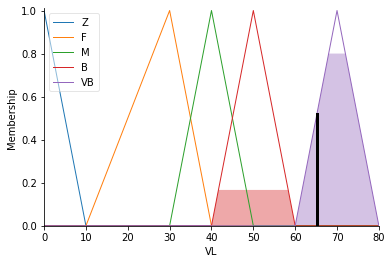

In [ ]:
velocity_value = ctrl.ControlSystemSimulation(velocity_ctrl)
velocity_value.input['distance'] = 150
velocity_value.input['angle'] = 170
velocity_value.compute()
print(velocity_value.output['VR'])
VR.view(sim=velocity_value)
print(velocity_value.output['VL'])
VL.view(sim=velocity_value)

# Analysis and use of fuzzy intelligent technique for navigation of humanoid robot in obstacle prone zone

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# make input and output
FOD = ctrl.Antecedent(np.arange(0,6.01,0.01),'front')
LOD = ctrl.Antecedent(np.arange(0,6.01,0.01),'left')
ROD = ctrl.Antecedent(np.arange(0,6.01,0.01),'right')
BA  = ctrl.Antecedent(np.arange(-180,180.01,0.01),'angle')

LV  = ctrl.Consequent(np.arange(-5,5,0.1),"l_vel")
RV  = ctrl.Consequent(np.arange(-5,5,0.1),"r_vel")

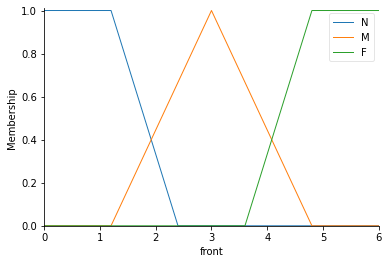

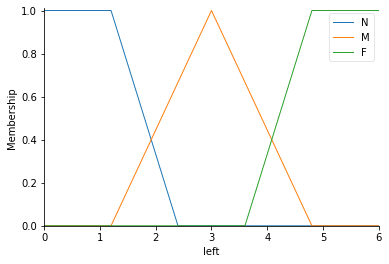

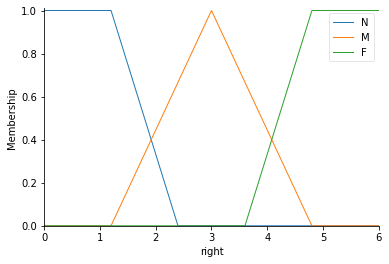

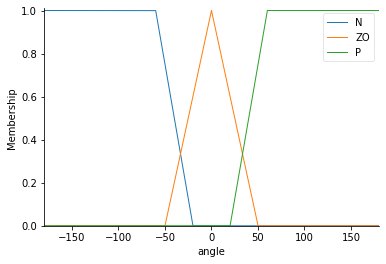

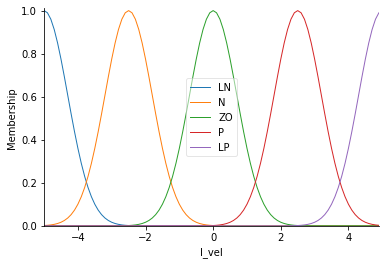

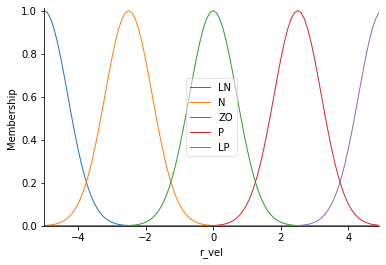

In [ ]:
# make membership
FOD["N"]   = fuzz.trapmf(FOD.universe,[0,0,1.2,2.4])
FOD["M"] = fuzz.trimf(FOD.universe,[1.2,3,4.8])
FOD["F"]    = fuzz.trapmf(FOD.universe,[3.6,4.8,6,6])

LOD["N"]   = fuzz.trapmf(LOD.universe,[0,0,1.2,2.4])
LOD["M"] = fuzz.trimf(LOD.universe,[1.2,3,4.8])
LOD["F"]    = fuzz.trapmf(LOD.universe,[3.6,4.8,6,6])

ROD["N"]   = fuzz.trapmf(ROD.universe,[0,0,1.2,2.4])
ROD["M"] = fuzz.trimf(ROD.universe,[1.2,3,4.8])
ROD["F"]    = fuzz.trapmf(ROD.universe,[3.6,4.8,6,6])

BA["N"]       = fuzz.trapmf(BA.universe,[-180,-180,-60,-20])
BA["ZO"]      = fuzz.trimf(BA.universe,[-50,0,50])
BA["P"]       = fuzz.trapmf(BA.universe,[20,60,180,180])

LV["LN"]      = fuzz.gaussmf(LV.universe,-5,0.7)
LV["N"]       = fuzz.gaussmf(LV.universe,-2.5,0.7)
LV["ZO"]      = fuzz.gaussmf(LV.universe,0,0.7)
LV["P"]       = fuzz.gaussmf(LV.universe,2.5,0.7)
LV["LP"]       = fuzz.gaussmf(LV.universe,5,0.7)

RV["LN"]      = fuzz.gaussmf(RV.universe,-5,0.7)
RV["N"]       = fuzz.gaussmf(RV.universe,-2.5,0.7)
RV["ZO"]      = fuzz.gaussmf(RV.universe,0,0.7)
RV["P"]       = fuzz.gaussmf(RV.universe,2.5,0.7)
RV["LP"]      = fuzz.gaussmf(RV.universe,5,0.7)


FOD.view()
LOD.view()
ROD.view()
BA.view()

LV.view()
RV.view()

In [ ]:
# make rule

# Implementation Using a MATLAB-Based Rapid Prototyping System

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ModuleNotFoundError: ignored

In [ ]:
# make input and output
S0 = ctrl.Antecedent(np.arange(0,1.01,0.01),'Sensor0')
S1 = ctrl.Antecedent(np.arange(0,1.01,0.01),'Sensor1')
S2 = ctrl.Antecedent(np.arange(0,1.01,0.01),'Sensor2')
S3 = ctrl.Antecedent(np.arange(0,1.01,0.01),'Sensor3')
S4 = ctrl.Antecedent(np.arange(0,1.01,0.01),'Sensor4')
S5 = ctrl.Antecedent(np.arange(0,1.01,0.01),'Sensor5')
spd1 = ctrl.Consequent(np.arange(0,100.1,0.1),'Speed1') 
spd2 = ctrl.Consequent(np.arange(0,100.1,0.1),'Speed2') 

In [ ]:
# making membership
S0['far'] = fuzz.zmf(S0.universe, 0.2, 0.3)
S0['approaching'] = fuzz.trimf(S0.universe, [0.2,0.3,0.4])
S0['close'] = fuzz.trimf(S0.universe, [0.3,0.45,0.6])
S0['colliding'] = fuzz.smf(S0.universe, 0.5, 0.75)

S1['far'] = fuzz.zmf(S1.universe, 0.2, 0.3)
S1['approaching'] = fuzz.trimf(S1.universe, [0.2,0.3,0.4])
S1['close'] = fuzz.trimf(S1.universe, [0.3,0.45,0.6])
S1['colliding'] = fuzz.smf(S1.universe, 0.5, 0.75)

S2['far'] = fuzz.zmf(S2.universe, 0.2, 0.3)
S2['approaching'] = fuzz.trimf(S2.universe, [0.2,0.3,0.4])
S2['close'] = fuzz.trimf(S2.universe, [0.3,0.45,0.6])
S2['colliding'] = fuzz.smf(S2.universe, 0.5, 0.75)

S3['far'] = fuzz.zmf(S3.universe, 0.2, 0.3)
S3['approaching'] = fuzz.trimf(S3.universe, [0.2,0.3,0.4])
S3['close'] = fuzz.trimf(S3.universe, [0.3,0.45,0.6])
S3['colliding'] = fuzz.smf(S3.universe, 0.5, 0.75)

S4['far'] = fuzz.zmf(S4.universe, 0.2, 0.3)
S4['approaching'] = fuzz.trimf(S4.universe, [0.2,0.3,0.4])
S4['close'] = fuzz.trimf(S4.universe, [0.3,0.45,0.6])
S4['colliding'] = fuzz.smf(S4.universe, 0.5, 0.75)

S5['far'] = fuzz.zmf(S5.universe, 0.2, 0.3)
S5['approaching'] = fuzz.trimf(S5.universe, [0.2,0.3,0.4])
S5['close'] = fuzz.trimf(S5.universe, [0.3,0.45,0.6])
S5['colliding'] = fuzz.smf(S5.universe, 0.5, 0.75)

spd1.automf(names = ['NF', 'NS', 'ZO', 'PS', 'PF']) 
spd2.automf(names = ['NF', 'NS', 'ZO', 'PS', 'PF'])

S0.view()
S1.view()
S2.view()
spd1.view()
spd2.view()

In [ ]:
# Create rules
rule1 = ctrl.Rule(antecedent=(S0['colliding']|S1['colliding']|S2['colliding']),
                  consequent=(spd1['NF'],spd2['ZO']))
rule2 = ctrl.Rule(antecedent=(S3['colliding']|S4['colliding']|S5['colliding']),
                  consequent=(spd1['ZO'],spd2['NF']))
rule3 = ctrl.Rule(antecedent=(S0['close']|S1['approaching']),
                  consequent=(spd1['NF'],spd2['PS']))
rule4 = ctrl.Rule(antecedent=(S4['approaching']|S5['close']),
                  consequent=(spd1['PS'],spd2['NF']))
rule5 = ctrl.Rule(antecedent=(S0['far']|S1['far']|S2['far']|S3['far']|S4['far']|S5['far']),
                  consequent=(spd1['PF'],spd2['PF']))

spd_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
spd_calc = ctrl.ControlSystemSimulation(spd_control)

In [ ]:
spd_calc.input['Sensor0'] = 0.7
spd_calc.input['Sensor1'] = 0.5
spd_calc.input['Sensor2'] = 0.8
spd_calc.input['Sensor3'] = 0
spd_calc.input['Sensor4'] = 0
spd_calc.input['Sensor5'] = 0
spd_calc.compute()
print(spd_calc.output['Speed1'])
print(spd_calc.output['Speed2'])
spd1.view(sim = spd_calc)
spd2.view(sim = spd_calc)